# Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# Config pandas
pd.set_option('display.max_columns', None)

columns = [
    'age',
    'class of worker', 
    'detailed industry recode',
    'detailed occupation recode',
    'education',
    'wage per hour',
    'enroll in edu inst last wk',
    'marital stat',
    'major industry code',
    'major occupation code',
    'race',
    'hispanic origin',
    'sex',
    'member of a labor union',
    'reason for unemployment',
    'full or part time employment stat',
    'capital gains',
    'capital losses',
    'dividends from stocks',
    'tax filer stat',
    'region of previous residence',
    'state of previous residence',
    'detailed household and family stat',
    'detailed household summary in household',
    'instance weight',
    'migration code-change in msa',
    'migration code-change in reg',
    'migration code-move within reg',
    'live in this house 1 year ago',
    'migration prev res in sunbelt',
    'num persons worked for employer',
    'family members under 18',
    'country of birth father',
    'country of birth mother',
    'country of birth self',
    'citizenship',
    'own business or self employed',
    "fill inc questionnaire for veteran's admin",
    'veterans benefits',
    'weeks worked in year',
    'year',
    'income'
]

# Read both train and test datasets
df_train = pd.read_csv('../data/census_income_learn.csv', names=columns)
df_test = pd.read_csv('../data/census_income_test.csv', names=columns)

# Add dataset flag
df_train['is_train'] = 1
df_test['is_train'] = 0

# Concatenate the datasets
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df.head()


,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income,is_train
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.,1
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.,1
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.,1
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.,1
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.,1


# Exploratory Data Analysis (EDA)

## 1. Data Cleaning

In [3]:
# Trim whitespace from all object columns
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].str.strip()

# Standardize missing value placeholders
df.replace(['Not in universe', 'Not in universe or children', '?'], np.nan, inplace=True)

# Clean and binarize the income column
df['income'] = df['income'].replace({'50000+.': 1, '- 50000.': 0})

/var/folders/yg/3tnx7zsx6hl_byn7wl8k03ym0000gq/T/ipykernel_56194/2571920724.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace({'50000+.': 1, '- 50000.': 0})


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299285 entries, 0 to 299284
Data columns (total 43 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         299285 non-null  int64  
 1   class of worker                             148961 non-null  object 
 2   detailed industry recode                    299285 non-null  int64  
 3   detailed occupation recode                  299285 non-null  int64  
 4   education                                   299285 non-null  object 
 5   wage per hour                               299285 non-null  int64  
 6   enroll in edu inst last wk                  18918 non-null   object 
 7   marital stat                                299285 non-null  object 
 8   major industry code                         148318 non-null  object 
 9   major occupation code                       148318 non-null  object 
 

In [5]:
df.describe(include='all')

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income,is_train
count,299285.000000,148961,299285.000000,299285.000000,299285,299285.000000,18918,299285,148318,148318,299285,299285,299285,28543,9200,299285,299285.000000,299285.000000,299285.000000,299285,23467,22429,299285,299285,299285.000000,147404,147404,147404,299285,23467,299285.000000,82659,289143,290094,294128,299285,299285.000000,3011,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000
unique,NaN,8,NaN,NaN,17,NaN,2,7,23,14,5,10,2,2,5,8,NaN,NaN,NaN,6,5,49,38,8,NaN,8,7,8,3,2,NaN,4,42,42,42,5,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,NaN,High school graduate,NaN,High school,Never married,Retail trade,Adm support including clerical,White,All other,Female,No,Other job loser,Children or Armed Forces,NaN,NaN,NaN,Nonfiler,South,California,Householder,Householder,NaN,Nonmover,Nonmover,Nonmover,Not in universe under 1 year old,No,NaN,Both parents present,United-States,United-States,United-States,Native- Born in the United States,NaN,No,NaN,NaN,NaN,NaN,NaN
freq,NaN,108099,NaN,NaN,72554,NaN,10398,129628,25782,22089,250978,257830,155775,24068,3146,185459,NaN,NaN,NaN,112462,7314,2598,79939,113418,NaN,123937,123937,123937,151881,14798,NaN,58342,238531,240492,265342,265347,NaN,2421,NaN,NaN,NaN,NaN,NaN
mean,34.538998,NaN,15.345818,11.314743,NaN,55.105027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.742176,36.849010,195.851259,NaN,NaN,NaN,NaN,NaN,1740.101125,NaN,NaN,NaN,NaN,NaN,1.956172,NaN,NaN,NaN,NaN,NaN,0.176461,NaN,1.516498,23.178375,94.499998,0.062041,0.666666
std,22.318468,NaN,18.053638,14.455980,NaN,273.340729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4670.768536,269.789771,1937.847082,NaN,NaN,NaN,NaN,NaN,994.144299,NaN,NaN,NaN,NaN,NaN,2.364857,NaN,NaN,NaN,NaN,NaN,0.555240,NaN,0.850395,24.404016,0.500001,0.241231,0.471406
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,37.870000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,94.000000,0.000000,0.000000
25%,15.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1060.490000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000,94.000000,0.000000,0.000000
50%,33.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1617.110000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,8.000000,94.000000,0.000000,1.000000
75%,50.000000,NaN,33.000000,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2188.110000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,52.000000,95.000000,0.000000,1.000000


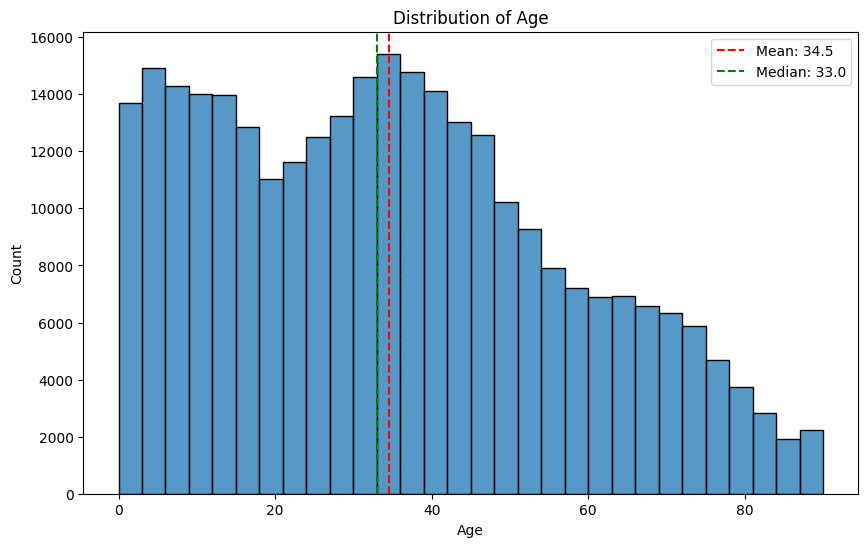

In [6]:
# Create distribution plot of age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30)
plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
plt.axvline(df['age'].median(), color='green', linestyle='--', label=f'Median: {df["age"].median():.1f}')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

/var/folders/yg/3tnx7zsx6hl_byn7wl8k03ym0000gq/T/ipykernel_56194/3789268768.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age = df.groupby('age_group')['income'].value_counts(normalize=True).unstack()


<Figure size 1000x600 with 0 Axes>

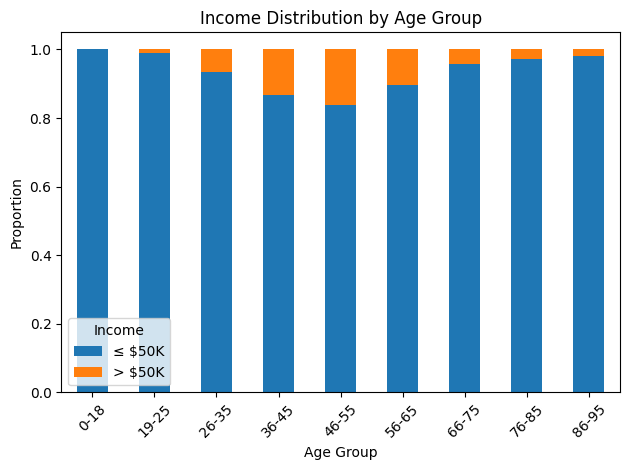


Point-biserial correlation between age and income:
Correlation coefficient: 0.136
P-value: 0.000
Shape after filtering out people under 18: (211767, 44)


In [7]:
# Create a stacked bar plot to show income distribution by age groups
plt.figure(figsize=(10, 6))

# Create age groups for better visualization
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65, 75, 85, 95], 
                        labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])

# Calculate proportions for each age group
income_by_age = df.groupby('age_group')['income'].value_counts(normalize=True).unstack()

# Create stacked bar plot
income_by_age.plot(kind='bar', stacked=True)
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Income', labels=['≤ $50K', '> $50K'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate point-biserial correlation
from scipy import stats
correlation = stats.pointbiserialr(df['age'], df['income'])
print(f"\nPoint-biserial correlation between age and income:")
print(f"Correlation coefficient: {correlation.correlation:.3f}")
print(f"P-value: {correlation.pvalue:.3f}")

# Keep only >18 yrs old people
# Filter for age > 18
df = df[df['age'] > 18]

# Print shape before and after filtering
print(f"Shape after filtering out people under 18: {df.shape}")



<Figure size 1000x600 with 0 Axes>

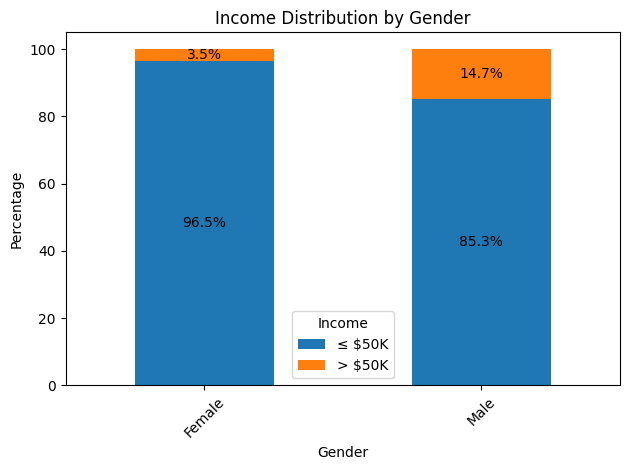

In [8]:
# Create a stacked bar plot to show income distribution by gender
plt.figure(figsize=(10, 6))

# Calculate proportions for each gender
income_by_gender = df.groupby('sex')['income'].value_counts(normalize=True).unstack() * 100

# Create stacked bar plot
ax = income_by_gender.plot(kind='bar', stacked=True)

# Add percentage labels on the bars
for c in ax.containers:
    # Add labels with percentages
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Income', labels=['≤ $50K', '> $50K'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


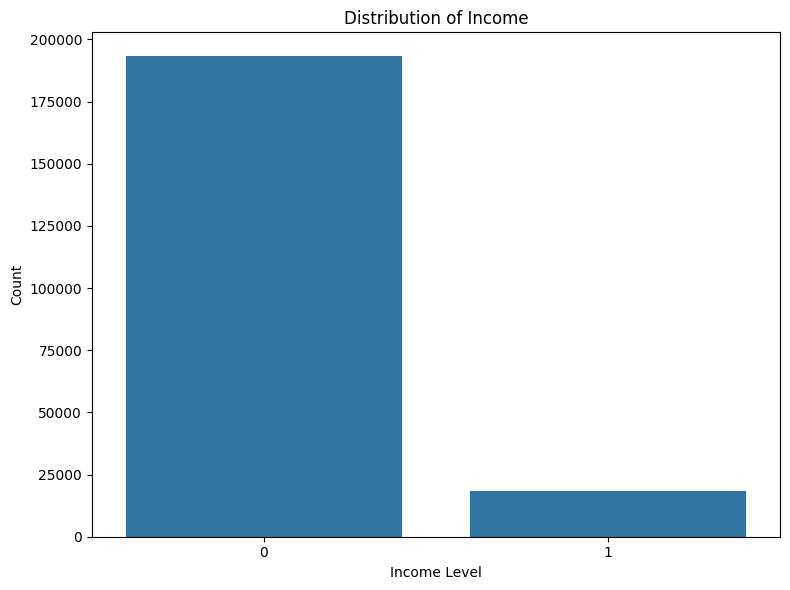


Income Distribution:
0: 91.2%
1: 8.8%


In [9]:
# Create a bar plot of income distribution
plt.figure(figsize=(8, 6))
income_counts = df['income'].value_counts()
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Distribution of Income')
plt.xlabel('Income Level') 
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print percentage distribution
print("\nIncome Distribution:")
income_dist = df['income'].value_counts(normalize=True) * 100
for category, percentage in income_dist.items():
    print(f"{category}: {percentage:.1f}%")


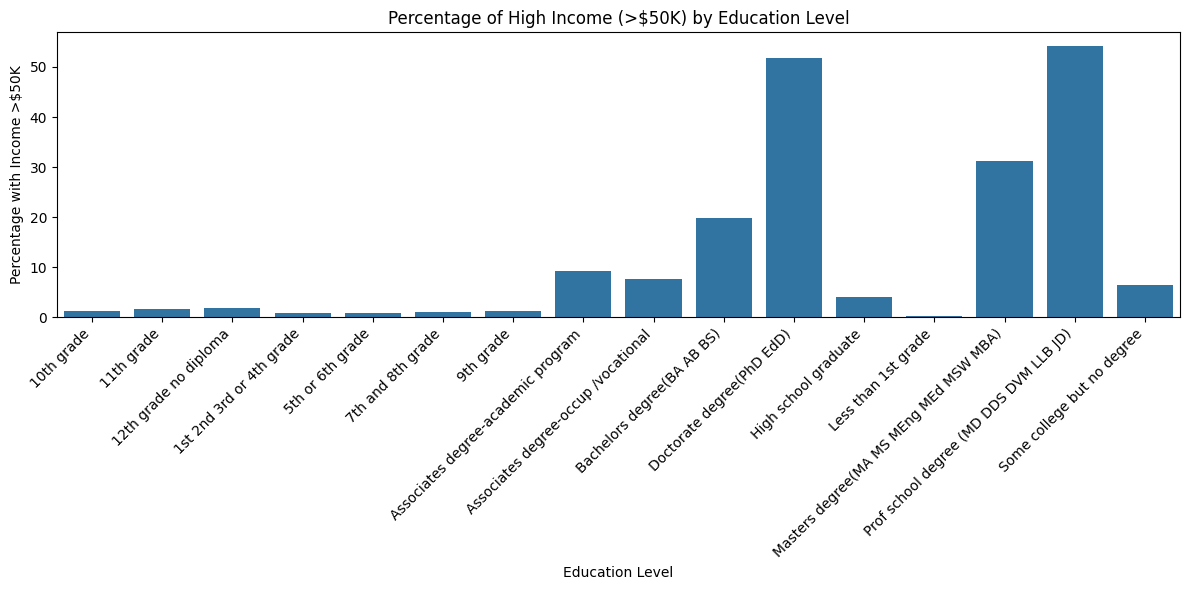


Percentage of people earning >$50K by education level:
10th grade: 1.3%
11th grade: 1.7%
12th grade no diploma: 1.8%
1st 2nd 3rd or 4th grade: 0.7%
5th or 6th grade: 0.8%
7th and 8th grade: 1.1%
9th grade: 1.1%
Associates degree-academic program: 9.2%
Associates degree-occup /vocational: 7.7%
Bachelors degree(BA AB BS): 19.8%
Doctorate degree(PhD EdD): 51.7%
High school graduate: 4.0%
Less than 1st grade: 0.2%
Masters degree(MA MS MEng MEd MSW MBA): 31.2%
Prof school degree (MD DDS DVM LLB JD): 54.2%
Some college but no degree: 6.4%


In [10]:
# Calculate percentage of high income earners by education level
education_income = df.groupby('education')['income'].mean() * 100

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=education_income.index, y=education_income.values)

# Customize the plot
plt.title('Percentage of High Income (>$50K) by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage with Income >$50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print actual percentages
print("\nPercentage of people earning >$50K by education level:")
for edu, pct in education_income.items():
    print(f"{edu}: {pct:.1f}%")


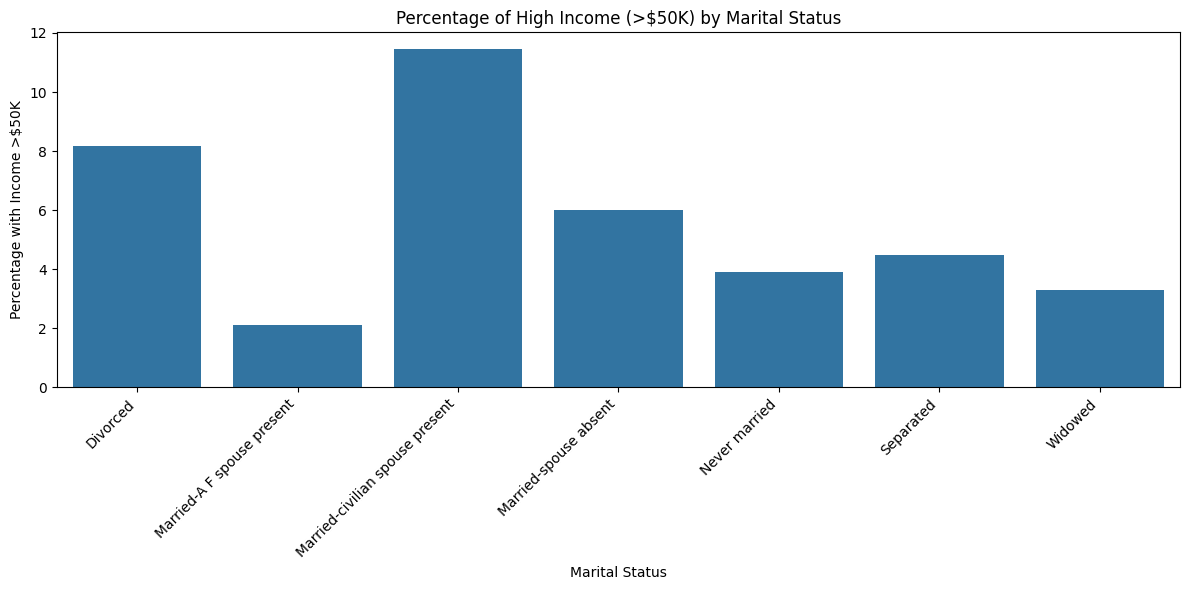


Percentage of people earning >$50K by marital status:
Divorced: 8.2%
Married-A F spouse present: 2.1%
Married-civilian spouse present: 11.4%
Married-spouse absent: 6.0%
Never married: 3.9%
Separated: 4.5%
Widowed: 3.3%


In [11]:
# Calculate percentage of high income earners by marital status
marital_income = df.groupby('marital stat')['income'].mean() * 100

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=marital_income.index, y=marital_income.values)

# Customize the plot
plt.title('Percentage of High Income (>$50K) by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage with Income >$50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print actual percentages
print("\nPercentage of people earning >$50K by marital status:")
for status, pct in marital_income.items():
    print(f"{status}: {pct:.1f}%")


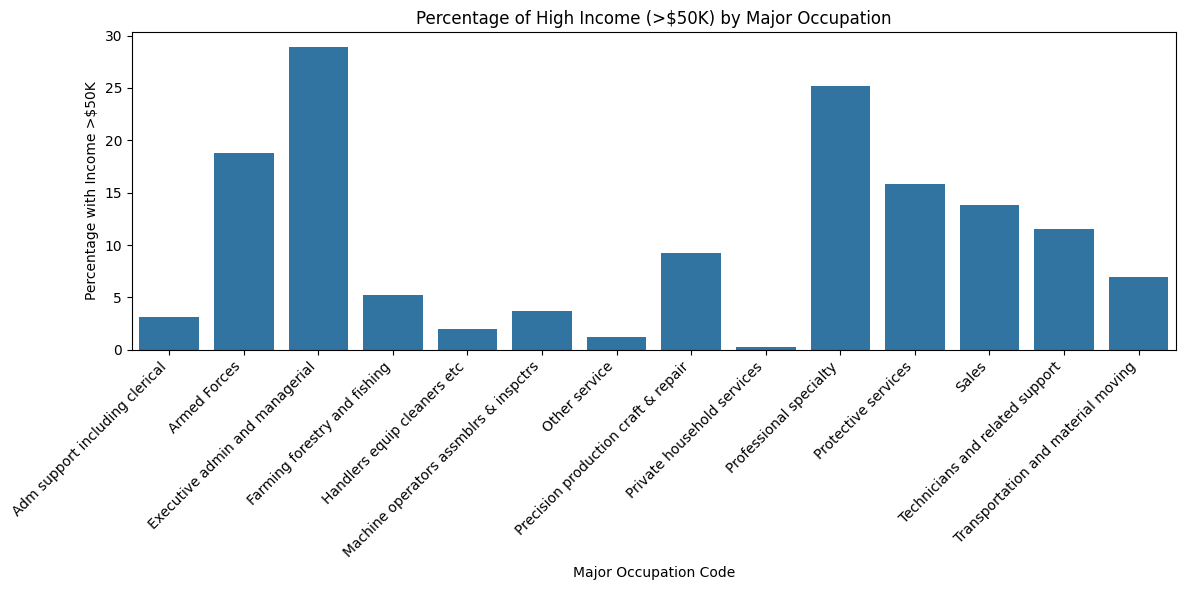


Percentage of people earning >$50K by occupation:
Adm support including clerical: 3.2%
Armed Forces: 18.8%
Executive admin and managerial: 28.9%
Farming forestry and fishing: 5.3%
Handlers equip cleaners etc: 1.9%
Machine operators assmblrs & inspctrs: 3.7%
Other service: 1.2%
Precision production craft & repair: 9.3%
Private household services: 0.3%
Professional specialty: 25.2%
Protective services: 15.8%
Sales: 13.8%
Technicians and related support: 11.6%
Transportation and material moving: 7.0%


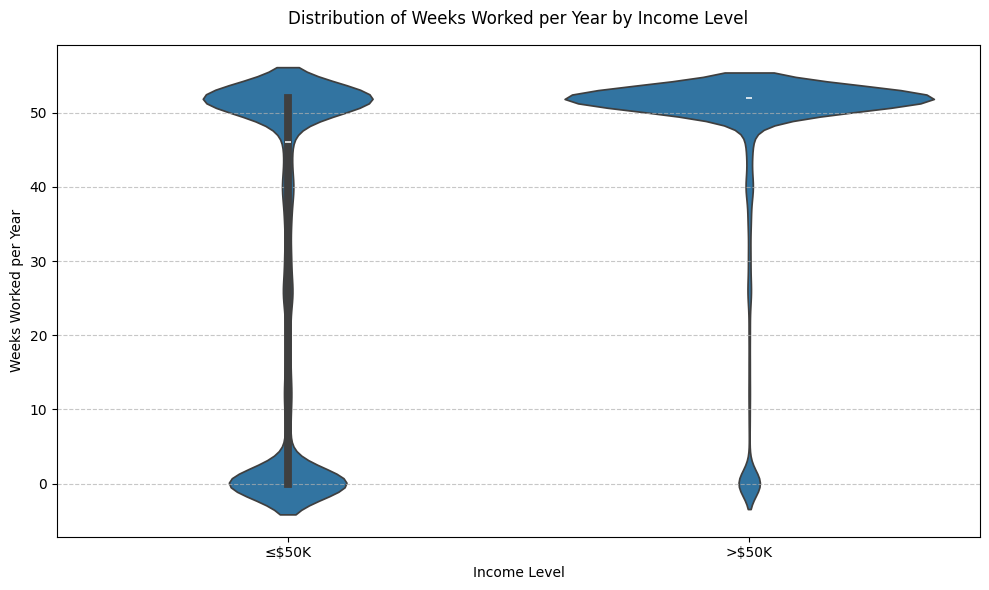


Summary statistics of weeks worked per year by income level:
          count  mean   std  min   25%   50%   75%   max
≤$50K  193202.0  30.4  23.7  0.0   0.0  46.0  52.0  52.0
>$50K   18565.0  48.1  12.3  0.0  52.0  52.0  52.0  52.0

Median weeks worked per year:
≤$50K: 46.0 weeks
>$50K: 52.0 weeks


In [12]:
# Calculate percentage of high income earners by occupation
occupation_income = df.groupby('major occupation code')['income'].mean() * 100

# Create bar plot for occupation
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_income.index, y=occupation_income.values)

# Customize the plot
plt.title('Percentage of High Income (>$50K) by Major Occupation')
plt.xlabel('Major Occupation Code') 
plt.ylabel('Percentage with Income >$50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print actual percentages
print("\nPercentage of people earning >$50K by occupation:")
for occ, pct in occupation_income.items():
    print(f"{occ}: {pct:.1f}%")

# Create violin plot for weeks worked by income level
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='weeks worked in year', data=df, inner='box')

# Customize the plot
plt.title('Distribution of Weeks Worked per Year by Income Level', fontsize=12, pad=15)
plt.xlabel('Income Level', fontsize=10)
plt.ylabel('Weeks Worked per Year', fontsize=10)

# Update x-axis labels to be more readable
plt.xticks([0, 1], ['≤$50K', '>$50K'])

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics with better formatting
print("\nSummary statistics of weeks worked per year by income level:")
stats = df.query('age > 18').groupby('income')['weeks worked in year'].describe()
stats.index = ['≤$50K', '>$50K']
print(stats.round(1))

# Print median weeks worked
print("\nMedian weeks worked per year:")
medians = df.groupby('income')['weeks worked in year'].median()
print(f"≤$50K: {medians[0]:.1f} weeks")
print(f">$50K: {medians[1]:.1f} weeks")


/var/folders/yg/3tnx7zsx6hl_byn7wl8k03ym0000gq/T/ipykernel_56194/3386862990.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_data = df[df['education'].isin(key_education_levels)].groupby(


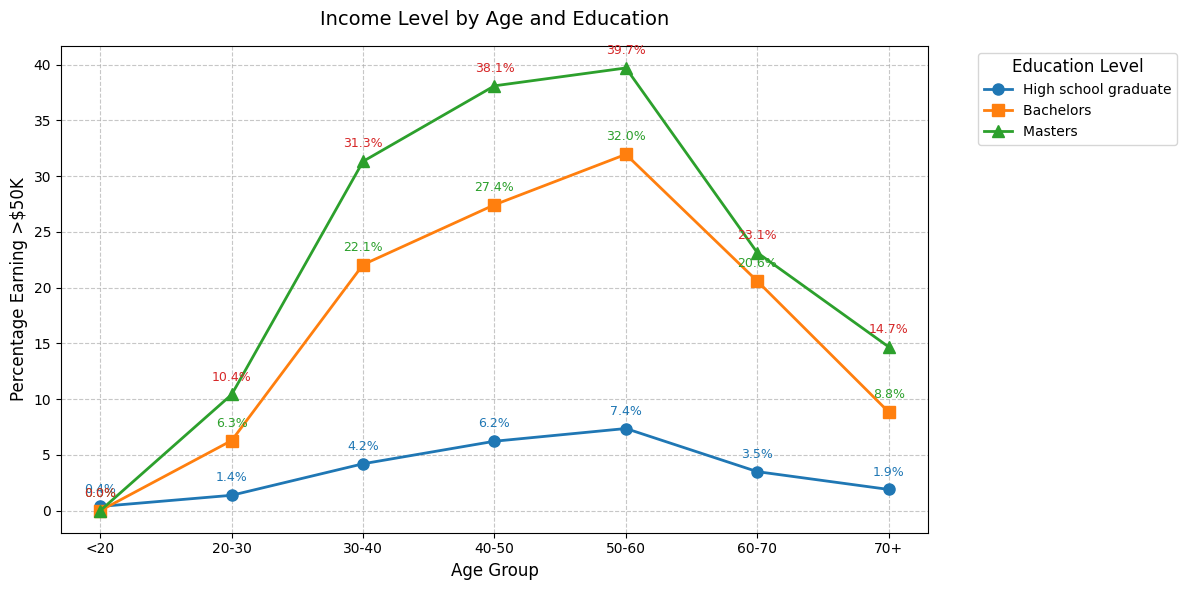


Percentage earning >$50K by age group and education level:
education  Bachelors degree(BA AB BS)  High school graduate  \
age_group                                                     
<20                               0.0                   0.4   
20-30                             6.3                   1.4   
30-40                            22.1                   4.2   
40-50                            27.4                   6.2   
50-60                            32.0                   7.4   
60-70                            20.6                   3.5   
70+                               8.8                   1.9   

education  Masters degree(MA MS MEng MEd MSW MBA)  
age_group                                          
<20                                           0.0  
20-30                                        10.4  
30-40                                        31.3  
40-50                                        38.1  
50-60                                        39.7  
60-70   

In [13]:
# Create age groups
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 20, 30, 40, 50, 60, 70, 100],
                        labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])

# Select key education levels to highlight
key_education_levels = [
    'High school graduate',
    'Bachelors degree(BA AB BS)',
    'Masters degree(MA MS MEng MEd MSW MBA)'
]

# Calculate percentage of high income by age group and education
interaction_data = df[df['education'].isin(key_education_levels)].groupby(
    ['age_group', 'education'])['income'].mean() * 100
interaction_data = interaction_data.unstack()

# Create the interaction plot
plt.figure(figsize=(12, 6))

# Plot lines for each education level with different colors and markers
colors = ['#1f77b4', '#2ca02c', '#d62728']
markers = ['o', 's', '^']
for (edu, color, marker) in zip(key_education_levels, colors, markers):
    plt.plot(range(len(interaction_data.index)), 
             interaction_data[edu],
             marker=marker,
             label=edu.replace('degree', '').replace('(BA AB BS)', '').replace('(MA MS MEng MEd MSW MBA)', ''),
             linewidth=2,
             markersize=8)

# Customize the plot
plt.title('Income Level by Age and Education', fontsize=14, pad=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage Earning >$50K', fontsize=12)
plt.xticks(range(len(interaction_data.index)), interaction_data.index, rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Education Level', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on the points
for edu, color in zip(key_education_levels, colors):
    for i, value in enumerate(interaction_data[edu]):
        plt.annotate(f'{value:.1f}%', 
                    (i, value),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=9,
                    color=color)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nPercentage earning >$50K by age group and education level:")
print(interaction_data.round(1))

# Calculate and print the increase in percentage points from age 20-30 to age 40-50
print("\nIncrease in percentage points (20-30 to 40-50):")
for edu in key_education_levels:
    increase = interaction_data.loc['40-50', edu] - interaction_data.loc['20-30', edu]
    print(f"{edu.replace('degree', '').strip()}: {increase:.1f} percentage points")


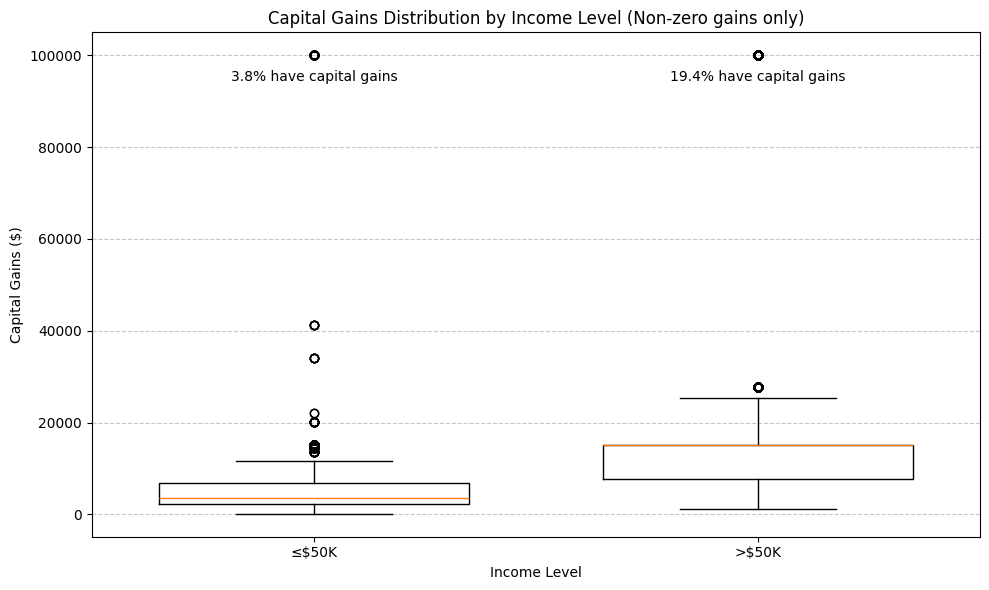

In [14]:
# Create a simple plot for capital gains distribution
plt.figure(figsize=(10, 6))

# Filter out zero values since they dominate the data
gains_by_income = [
    df[(df['income'] == i) & (df['capital gains'] > 0)]['capital gains'] 
    for i in [0, 1]
]

# Create basic box plots
plt.boxplot(gains_by_income,
            positions=[0, 1],
            widths=0.7,
            showfliers=True)  # Show outliers since we filtered zeros

# Basic styling
plt.title('Capital Gains Distribution by Income Level (Non-zero gains only)')
plt.xlabel('Income Level')
plt.ylabel('Capital Gains ($)')
plt.xticks([0, 1], ['≤$50K', '>$50K'])

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add simple statistics
for i, income_level in enumerate([0, 1]):
    gains = df[df['income'] == income_level]['capital gains']
    pct_non_zero = (gains > 0).sum() / len(gains) * 100
    plt.text(i, plt.ylim()[1] * 0.9,
             f"{pct_non_zero:.1f}% have capital gains",
             ha='center')

plt.tight_layout()
plt.show()


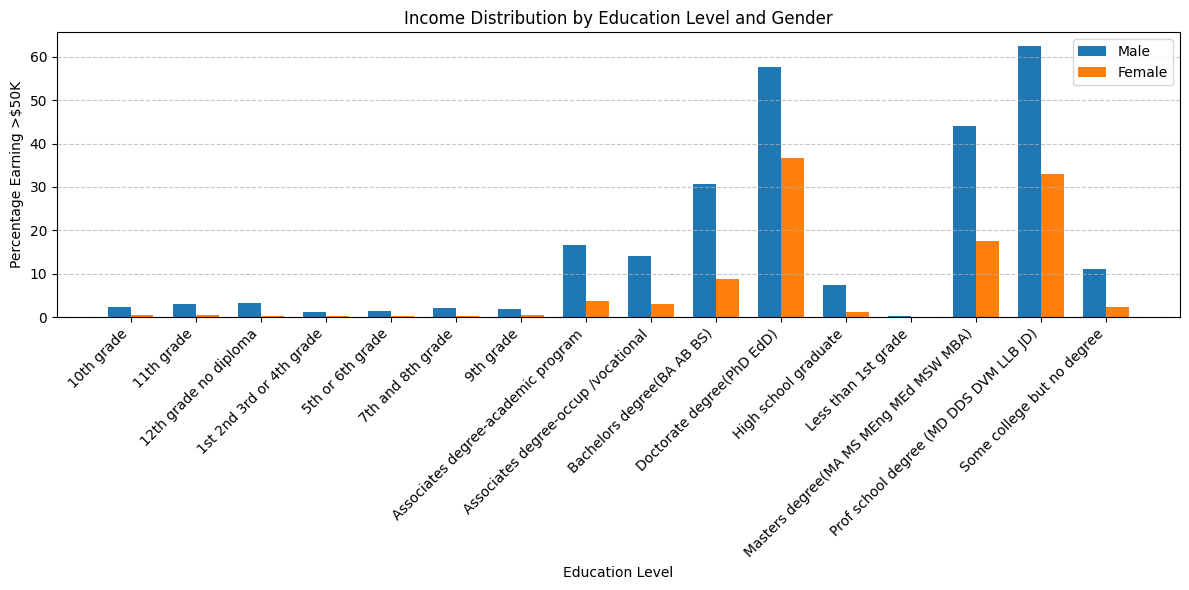


Percentage earning >$50K by education and gender:

10th grade:
Male: 2.4%
Female: 0.4%
Gender gap: 2.0 percentage points

11th grade:
Male: 3.0%
Female: 0.5%
Gender gap: 2.5 percentage points

12th grade no diploma:
Male: 3.2%
Female: 0.3%
Gender gap: 2.9 percentage points

1st 2nd 3rd or 4th grade:
Male: 1.1%
Female: 0.4%
Gender gap: 0.8 percentage points

5th or 6th grade:
Male: 1.5%
Female: 0.2%
Gender gap: 1.3 percentage points

7th and 8th grade:
Male: 2.1%
Female: 0.2%
Gender gap: 1.9 percentage points

9th grade:
Male: 2.0%
Female: 0.5%
Gender gap: 1.5 percentage points

Associates degree-academic program:
Male: 16.6%
Female: 3.8%
Gender gap: 12.8 percentage points

Associates degree-occup /vocational:
Male: 14.0%
Female: 2.9%
Gender gap: 11.1 percentage points

Bachelors degree(BA AB BS):
Male: 30.7%
Female: 8.8%
Gender gap: 22.0 percentage points

Doctorate degree(PhD EdD):
Male: 57.6%
Female: 36.6%
Gender gap: 21.0 percentage points

High school graduate:
Male: 7.4%
Female: 

In [15]:
# Analyze income distribution by education level and gender
education_gender_income = df.groupby(['education', 'sex'])['income'].mean() * 100
education_gender_income = education_gender_income.unstack()

# Create figure
plt.figure(figsize=(12, 6))

# Set width of bars and positions of the bars
bar_width = 0.35
x = np.arange(len(education_gender_income.index))

# Create bars
plt.bar(x - bar_width/2, education_gender_income['Male'], bar_width, label='Male')
plt.bar(x + bar_width/2, education_gender_income['Female'], bar_width, label='Female')

# Customize plot
plt.title('Income Distribution by Education Level and Gender')
plt.xlabel('Education Level')
plt.ylabel('Percentage Earning >$50K')
plt.xticks(x, education_gender_income.index, rotation=45, ha='right')
plt.legend()

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print the actual percentages and gaps
print("\nPercentage earning >$50K by education and gender:")
for edu in education_gender_income.index:
    male_pct = education_gender_income.loc[edu, 'Male']
    female_pct = education_gender_income.loc[edu, 'Female']
    gap = male_pct - female_pct
    print(f"\n{edu}:")
    print(f"Male: {male_pct:.1f}%")
    print(f"Female: {female_pct:.1f}%") 
    print(f"Gender gap: {gap:.1f} percentage points")

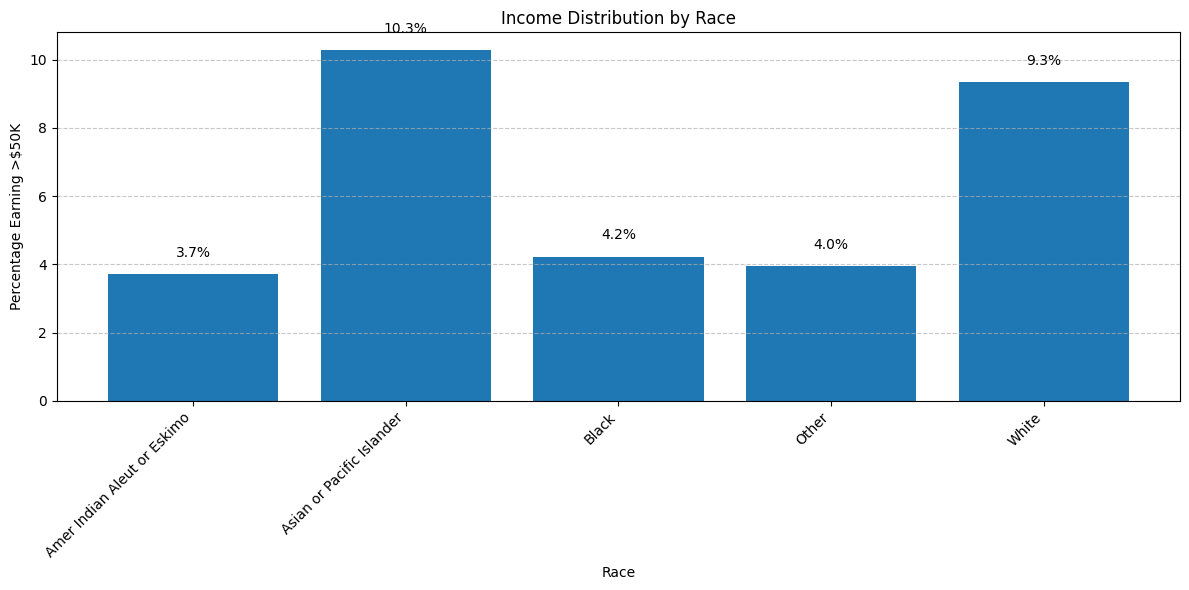


Percentage earning >$50K by race:

Amer Indian Aleut or Eskimo: 3.7%

Asian or Pacific Islander: 10.3%

Black: 4.2%

Other: 4.0%

White: 9.3%


In [16]:
# Analyze income distribution by race
race_income = df.groupby('race')['income'].mean() * 100

# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot
plt.bar(range(len(race_income)), race_income.values)

# Customize plot
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Percentage Earning >$50K')
plt.xticks(range(len(race_income)), race_income.index, rotation=45, ha='right')

# Add value labels on top of bars
for i, v in enumerate(race_income):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nPercentage earning >$50K by race:")
for race in race_income.index:
    print(f"\n{race}: {race_income[race]:.1f}%")


<Figure size 1500x800 with 0 Axes>

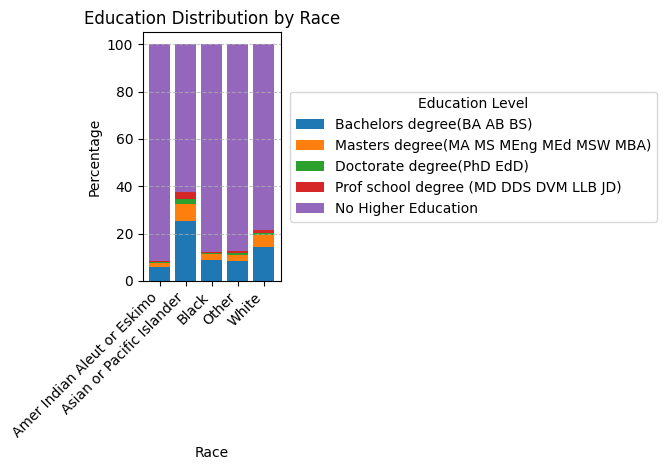


Percentage of population by education level and race:

Amer Indian Aleut or Eskimo:
Total with higher education: 8.3%
No higher education: 91.7%
- Bachelors degree(BA AB BS): 5.7%
- Masters degree(MA MS MEng MEd MSW MBA): 2.0%
- Doctorate degree(PhD EdD): 0.4%
- Prof school degree (MD DDS DVM LLB JD): 0.2%

Asian or Pacific Islander:
Total with higher education: 37.5%
No higher education: 62.5%
- Bachelors degree(BA AB BS): 25.2%
- Masters degree(MA MS MEng MEd MSW MBA): 7.2%
- Doctorate degree(PhD EdD): 2.3%
- Prof school degree (MD DDS DVM LLB JD): 2.8%

Black:
Total with higher education: 12.3%
No higher education: 87.7%
- Bachelors degree(BA AB BS): 8.7%
- Masters degree(MA MS MEng MEd MSW MBA): 2.7%
- Doctorate degree(PhD EdD): 0.4%
- Prof school degree (MD DDS DVM LLB JD): 0.5%

Other:
Total with higher education: 12.6%
No higher education: 87.4%
- Bachelors degree(BA AB BS): 8.3%
- Masters degree(MA MS MEng MEd MSW MBA): 2.7%
- Doctorate degree(PhD EdD): 0.7%
- Prof school degr

In [17]:
# Analyze education distribution by race
education_race = df.query('age > 18').groupby(['race', 'education']).size().unstack(fill_value=0)

# Calculate percentages within each race
education_race_pct = education_race.div(education_race.sum(axis=1), axis=0) * 100

# Select key education levels to focus on higher education
key_education_levels = [
    'Bachelors degree(BA AB BS)',
    'Masters degree(MA MS MEng MEd MSW MBA)', 
    'Doctorate degree(PhD EdD)',
    'Prof school degree (MD DDS DVM LLB JD)'
]

# Create figure with extra width to accommodate legend
plt.figure(figsize=(15, 8))

# Create stacked bar chart for selected education levels and add "No Higher Education"
higher_ed_pct = education_race_pct[key_education_levels]
no_ed_pct = 100 - higher_ed_pct.sum(axis=1)
plot_data = pd.concat([higher_ed_pct, pd.Series(no_ed_pct, name='No Higher Education')], axis=1)
plot_data.plot(kind='bar', stacked=True, width=0.8)

plt.title('Education Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.legend(title='Education Level', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nPercentage of population by education level and race:")
for race in education_race_pct.index:
    print(f"\n{race}:")
    total_higher_ed = education_race_pct.loc[race, key_education_levels].sum()
    print(f"Total with higher education: {total_higher_ed:.1f}%")
    print(f"No higher education: {100 - total_higher_ed:.1f}%")
    for edu in key_education_levels:
        pct = education_race_pct.loc[race, edu]
        print(f"- {edu}: {pct:.1f}%")


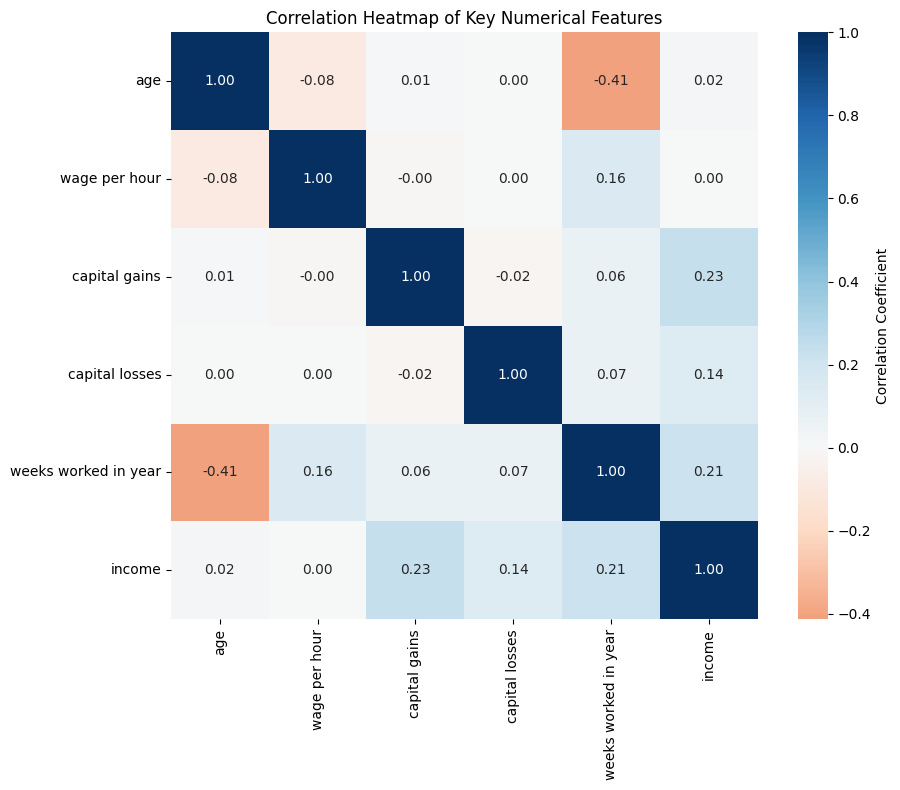


Key Insights:
- Strong positive correlations between income and:
  • capital gains: 0.23
  • capital losses: 0.14
  • weeks worked in year: 0.21


In [18]:
# Create correlation matrix of key numerical features
numerical_features = ['age', 'wage per hour', 'capital gains', 'capital losses', 'weeks worked in year', 'income']
correlation_matrix = df[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='RdBu',  # Red-Blue diverging colormap
            center=0,     # Center the colormap at 0
            fmt='.2f',    # Format correlation values to 2 decimal places
            square=True,  # Make cells square
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap of Key Numerical Features')
plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("- Strong positive correlations between income and:")
for feature in numerical_features[:-1]:
    corr = correlation_matrix.loc['income', feature]
    if abs(corr) > 0.1:  # Only show meaningful correlations
        print(f"  • {feature}: {corr:.2f}")

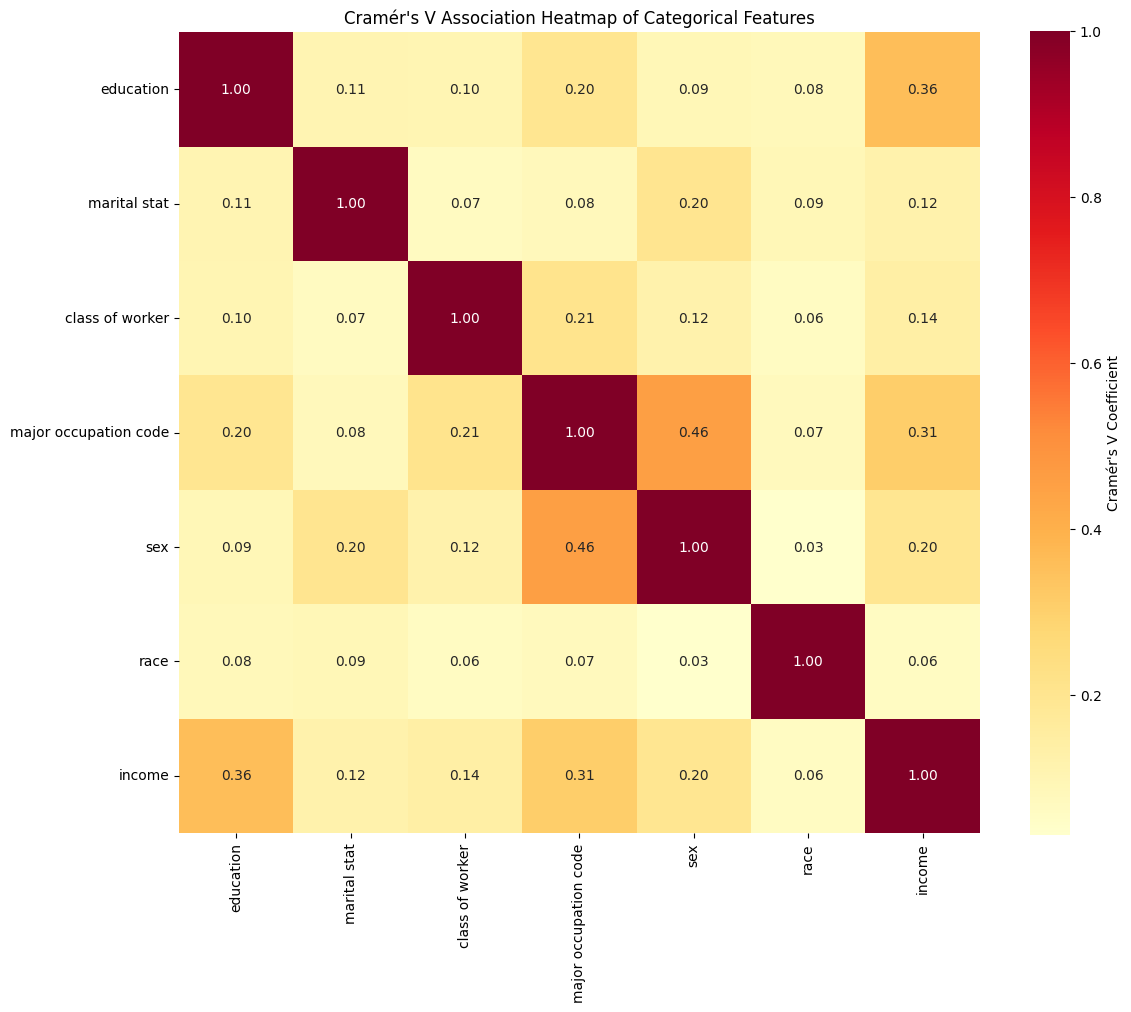


Key Insights from Categorical Associations:
- Strongest associations with income (>0.15):
  • education: 0.36
  • major occupation code: 0.31
  • sex: 0.20


In [19]:
# Calculate Cramer's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Select important categorical features
categorical_features = ['education', 'marital stat', 'class of worker', 
                      'major occupation code', 'sex', 'race', 'income']

# Create empty matrix to store Cramer's V values
n_features = len(categorical_features)
cramer_matrix = np.zeros((n_features, n_features))

# Calculate Cramer's V for each pair of features
for i in range(n_features):
    for j in range(n_features):
        if i != j:  # Skip diagonal (same feature comparison)
            cramer_matrix[i,j] = cramers_v(df[categorical_features[i]], 
                                         df[categorical_features[j]])
        else:
            cramer_matrix[i,j] = 1.0  # Perfect correlation with self

# Create DataFrame for better visualization
cramer_df = pd.DataFrame(cramer_matrix, 
                        index=categorical_features,
                        columns=categorical_features)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramer_df,
            annot=True,
            cmap='YlOrRd',
            fmt='.2f',
            square=True,
            cbar_kws={'label': "Cramér's V Coefficient"})

plt.title("Cramér's V Association Heatmap of Categorical Features")
plt.tight_layout()
plt.show()

print("\nKey Insights from Categorical Associations:")
print("- Strongest associations with income (>0.15):")
income_associations = cramer_df['income'].sort_values(ascending=False)[1:]  # Exclude self-correlation
strong_associations = income_associations[income_associations > 0.15]
for feature, value in strong_associations.items():
    print(f"  • {feature}: {value:.2f}")


# Modeling

## Data Loading and Preparation


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc
import lightgbm as lgb
import joblib
from sklearn.model_selection import GridSearchCV

X_train, X_val, y_train, y_val = train_test_split(df[df['is_train'] == 1], df[df['is_train'] == 1]['income'], test_size=0.2, random_state=42, stratify=df[df['is_train'] == 1]['income'])

## Preprocessing Pipeline

In [45]:
# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64', 'int32', np.number]).columns

# Drop target, weight and other non-feature columns
columns_to_drop = ['instance weight', 'is_train', 'income', 'age_group']
numerical_features = numerical_features.drop([col for col in columns_to_drop if col in numerical_features])
categorical_features = categorical_features.drop([col for col in columns_to_drop if col in categorical_features])

# Find features that are neither numerical, categorical nor dropped
all_features = set(X_train.columns)
selected_features = set(numerical_features) | set(categorical_features) | set(columns_to_drop)
unselected_features = all_features - selected_features

# Print features and their types
print("\nNumerical Features:")
for feat in numerical_features:
    print(f"  • {feat}: {X_train[feat].dtype}")

print("\nCategorical Features:")
for feat in categorical_features:
    print(f"  • {feat}: {X_train[feat].dtype}")

print("\nDropped Features:")
for feat in columns_to_drop:
    print(f"  • {feat}")

print("\nUnselected Features:")
for feat in unselected_features:
    print(f"  • {feat}: {X_train[feat].dtype}")

# Validate features
if len(categorical_features) == 0:
    raise ValueError("No categorical features found")
if len(numerical_features) == 0:
    raise ValueError("No numerical features found")

# Create the preprocessing pipelines with robust settings
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a preprocessor object using ColumnTransformer with error handling
try:
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
except Exception as e:
    print(f"Error creating preprocessor: {str(e)}")
    raise


Numerical Features:
  • age: int64
  • detailed industry recode: int64
  • detailed occupation recode: int64
  • wage per hour: int64
  • capital gains: int64
  • capital losses: int64
  • dividends from stocks: int64
  • num persons worked for employer: int64
  • own business or self employed: int64
  • veterans benefits: int64
  • weeks worked in year: int64
  • year: int64

Categorical Features:
  • class of worker: object
  • education: object
  • enroll in edu inst last wk: object
  • marital stat: object
  • major industry code: object
  • major occupation code: object
  • race: object
  • hispanic origin: object
  • sex: object
  • member of a labor union: object
  • reason for unemployment: object
  • full or part time employment stat: object
  • tax filer stat: object
  • region of previous residence: object
  • state of previous residence: object
  • detailed household and family stat: object
  • detailed household summary in household: object
  • migration code-change in ms

## Baseline Model

In [46]:
# --- Baseline Model: Logistic Regression ---
print('Training Logistic Regression model...')
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict_proba(X_val)[:, 1]
roc_auc_lr = roc_auc_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, lr_pipeline.predict(X_val))
precision_lr, recall_lr, _ = precision_recall_curve(y_val, y_pred_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

print(f'Logistic Regression Validation ROC AUC: {roc_auc_lr:.4f}')
print(f'Logistic Regression Validation F1 Score: {f1_lr:.4f}')
print(f'Logistic Regression Validation PR AUC: {pr_auc_lr:.4f}')

Training Logistic Regression model...


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Validation ROC AUC: 0.9172
Logistic Regression Validation F1 Score: 0.4680
Logistic Regression Validation PR AUC: 0.5996


## Advanced Model: LightGBM with Hyperparameter Tuning

In [47]:
# --- Advanced Model: LightGBM with Hyperparameter Tuning ---
print('\nTraining LightGBM model with Hyperparameter Tuning...')

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__num_leaves': [31, 61],
    'classifier__reg_alpha': [0.1, 0.5]
}

# Create the LightGBM pipeline
lgb_pipeline_tuned = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', lgb.LGBMClassifier(random_state=42, class_weight='balanced'))])

# Create the GridSearchCV object
grid_search = GridSearchCV(lgb_pipeline_tuned, param_grid, cv=3, scoring='average_precision', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_lgb_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_lgb_tuned = best_lgb_model.predict_proba(X_val)[:, 1]
roc_auc_lgb_tuned = roc_auc_score(y_val, y_pred_lgb_tuned)
f1_lgb_tuned = f1_score(y_val, best_lgb_model.predict(X_val))
precision_lgb_tuned, recall_lgb_tuned, _ = precision_recall_curve(y_val, y_pred_lgb_tuned)
pr_auc_lgb_tuned = auc(recall_lgb_tuned, precision_lgb_tuned)

print('\nBest LightGBM Hyperparameters:', grid_search.best_params_)
print(f'Tuned LightGBM Validation ROC AUC: {roc_auc_lgb_tuned:.4f}')
print(f'Tuned LightGBM Validation F1 Score: {f1_lgb_tuned:.4f}')
print(f'Tuned LightGBM Validation PR AUC: {pr_auc_lgb_tuned:.4f}')


Training LightGBM model with Hyperparameter Tuning...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 6602, number of negative: 68622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1682
[LightGBM] [Info] Number of data points in the train set: 75224, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.235548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1; total time=   6.0s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Total Bins 1682
[LightGBM] [Info] Number of data points in the train set: 75224, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1; total time=   6.6s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.148871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=   6.9s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=   7.1s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68622
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.330225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.205865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] 

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  10.0s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.236928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 6602, number of negative: 68622


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.331791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1682
[LightGBM] [Info] Number of data points in the train set: 75224, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  11.1s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  12.1s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.240179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  13.2s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  13.5s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  13.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 6602, number of negative: 68622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1; total time=  13.5s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1; total time=  12.7s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.130293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=  12.5s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=  12.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.271196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.242291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=  11.8s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.233963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Lig

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1; total time=  11.0s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1; total time=  11.2s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1; total time=  10.4s
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  20.2s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=   9.7s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.297952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  20.7s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  20.2s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  19.8s
[CV] END classifier__learning_rate=0.05, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  19.2s
[LightGBM] [

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=   6.9s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=   6.5s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6602, number of negative: 68622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1682
[LightGBM] [Info] Number of data points in the train set: 75224, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Ligh

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.294740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  10.3s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.222841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  10.3s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6602, number of negative: 68622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.168308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1682
[LightGBM] [Info] Number of data points in the train set: 75224, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  11.5s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.352945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  11.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.366730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  13.3s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.191520 seconds.
You can set `force_row_wise=true` to remove the overhe

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1; total time=  12.8s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.183986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1; total time=  13.8s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.127396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Ligh

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6602, number of negative: 68622
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=  13.3s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.255606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1682
[LightGBM] [Info] Number of data points in the train set: 75224, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.232789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] 

/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=  13.3s
[LightGBM] [Info] Number of positive: 6602, number of negative: 68623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.157081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 75225, number of used features: 369
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5; total time=  13.2s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  20.2s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  19.2s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.1; total time=  18.7s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  18.0s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  17.3s


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200, classifier__num_leaves=61, classifier__reg_alpha=0.5; total time=  16.2s
[LightGBM] [Info] Number of positive: 9903, number of negative: 102934
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1693
[LightGBM] [Info] Number of data points in the train set: 112837, number of used features: 371
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Best LightGBM Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200, 'classifier__num_leaves': 61, 'classifier__reg_alpha': 0.5}
Tuned LightGBM Validation ROC AUC: 0.9305
Tuned LightGBM Validation F1 Score: 0.5351
Tuned LightGBM Validation PR AUC: 0.6758


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Final Evaluation and Feature Importance


In [49]:
# --- Final Evaluation on Test Set ---
print('\nEvaluating the best model on the test set...')
best_model = best_lgb_model if pr_auc_lgb_tuned > pr_auc_lr else lr_pipeline

# Get test data
X_test = df[df['is_train'] == 0].drop(['income', 'is_train'], axis=1)
y_test = df[df['is_train'] == 0]['income']

y_pred_test = best_model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)
f1_test = f1_score(y_test, best_model.predict(X_test))
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc_test = auc(recall_test, precision_test)

print(f'Best Model Test ROC AUC: {roc_auc_test:.4f}')
print(f'Best Model Test F1 Score: {f1_test:.4f}')
print(f'Best Model Test PR AUC: {pr_auc_test:.4f}')

# --- Feature Importance ---
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    print('\nFeature Importances:')
    try:
        all_feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
        importances = best_model.named_steps['classifier'].feature_importances_
        feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
        print(feature_importance_df.head(15))
    except Exception as e:
        print(f'Could not get feature importances: {e}')


Evaluating the best model on the test set...


/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/amine.biad/Workspace/perso/dataiku-amine-biad/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Best Model Test ROC AUC: 0.9360
Best Model Test F1 Score: 0.5426
Best Model Test PR AUC: 0.6901

Feature Importances:
                                               feature  importance
0                                             num__age        1742
2                      num__detailed occupation recode         889
6                           num__dividends from stocks         776
1                        num__detailed industry recode         738
7                 num__num persons worked for employer         551
10                           num__weeks worked in year         549
4                                   num__capital gains         474
5                                  num__capital losses         433
3                                   num__wage per hour         283
101                                    cat__sex_Female         179
8                   num__own business or self employed         162
32                 cat__education_High school graduate         129
34   cat__e

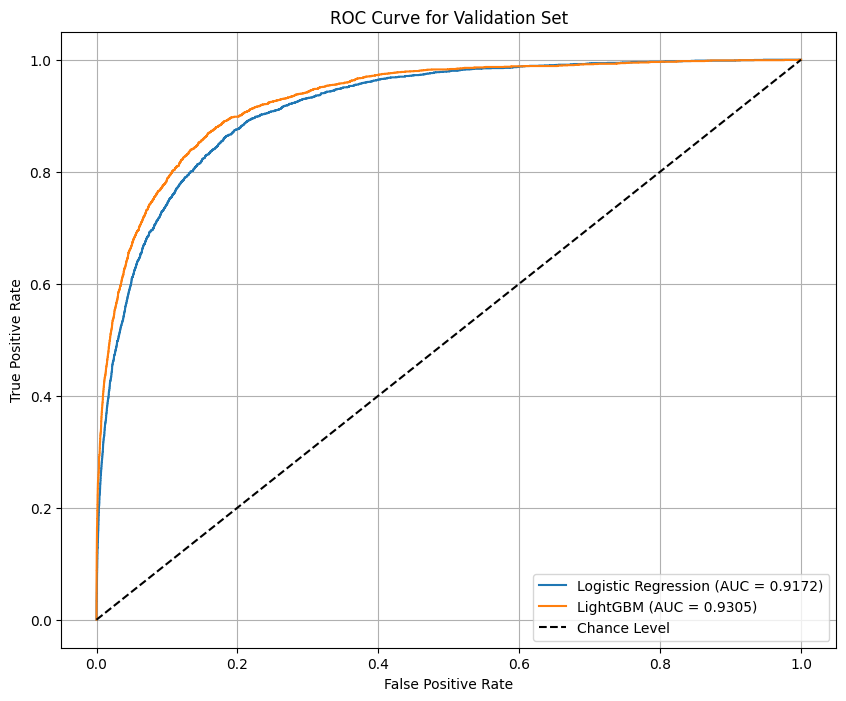

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Model Performance Visualization ---
# 1. ROC Curve
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_val, y_pred_lr)
fpr_lgb, tpr_lgb, _ = roc_curve(y_val, y_pred_lgb_tuned)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb_tuned:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Validation Set')
plt.legend()
plt.grid()
plt.show()

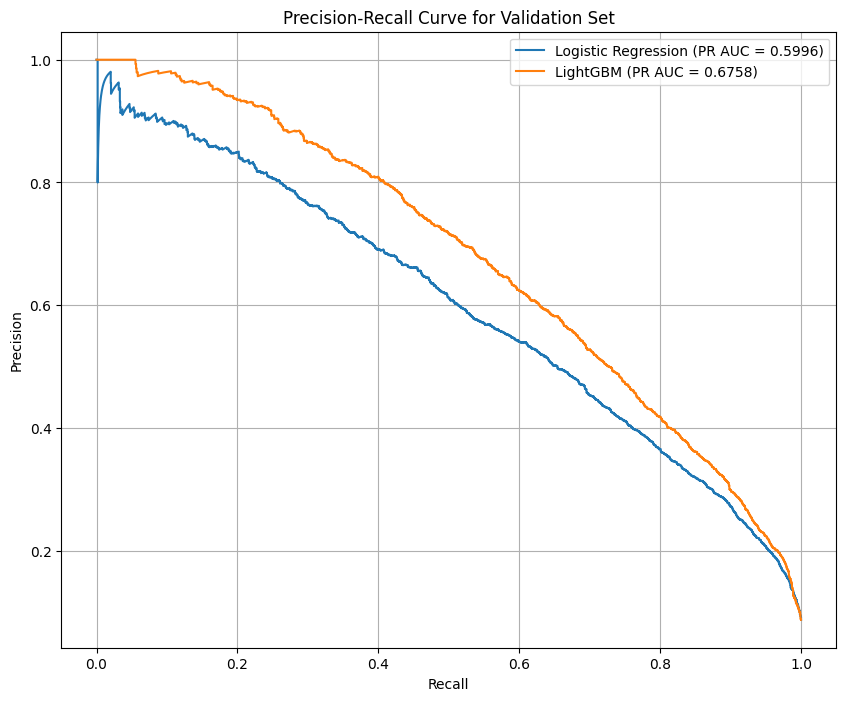

In [51]:
# 2. Precision-Recall Curve
plt.figure(figsize=(10, 8))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (PR AUC = {pr_auc_lr:.4f})')
plt.plot(recall_lgb_tuned, precision_lgb_tuned, label=f'LightGBM (PR AUC = {pr_auc_lgb_tuned:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Validation Set')
plt.legend()
plt.grid()
plt.show()

/var/folders/yg/3tnx7zsx6hl_byn7wl8k03ym0000gq/T/ipykernel_56194/640990962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')


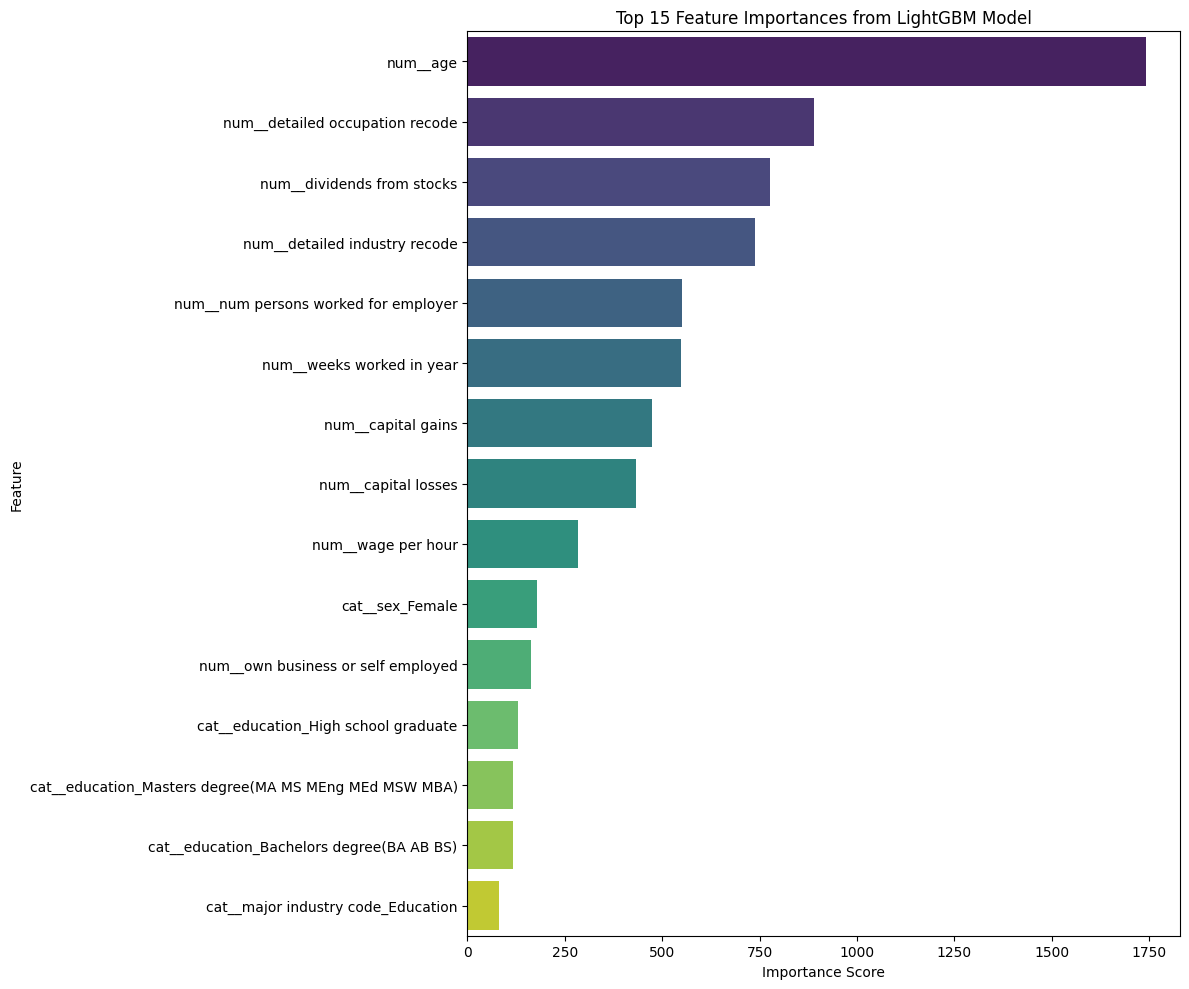

In [52]:
# --- Feature Importance Visualization ---
if 'feature_importance_df' in locals():
    plt.figure(figsize=(12, 10))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')
    plt.title('Top 15 Feature Importances from LightGBM Model')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance dataframe not found. Please run the model training cells first.")